(chang_ramsey)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Competitive Equilibria of a Model of Chang

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install polytope quantecon

     |████████████████████████████████| 51 kB 10.3 MB/s 


 \

 |

 /

 -

 \

 |

 /

 -

 done
  Created wheel for polytope: filename=polytope-0.2.3-py3-none-any.whl size=46059 sha256=ee8c3d27cd8f419576cef833683dd7b0405955ef819546bab2599a8ffe3f9ec3
  Stored in directory: /home/runner/.cache/pip/wheels/95/f5/21/a783bcd283ac5a8703a014e2751935eaf4dc59628aff4c9688
Successfully built polytope


## Overview

This lecture describes how Chang {cite}`chang1998credible`
analyzed **competitive equilibria** and a best competitive equilibrium called a  **Ramsey plan**.

He did this by

* characterizing a competitive equilibrium recursively in a way also employed
  in the {doc}`dynamic Stackelberg problems <dyn_stack>` and {doc}`Calvo model <calvo>` lectures
  to pose Stackelberg problems in linear economies, and then
* appropriately adapting an argument of Abreu, Pearce, and Stachetti
  {cite}`APS1990` to describe key features of the  set of competitive equilibria

Roberto Chang {cite}`chang1998credible`  chose a model of  Calvo {cite}`Calvo1978`
as a simple structure that conveys ideas that apply more broadly.

A textbook version of Chang's model appears in chapter 25 of {cite}`Ljungqvist2012`.

This lecture and {doc}`Credible Government Policies in Chang Model <chang_credible>`
can be viewed as more sophisticated and complete treatments of the
topics discussed in {doc}`Ramsey plans, time inconsistency, sustainable plans <calvo>`.

Both this lecture and {doc}`Credible Government Policies in Chang Model <chang_credible>`
make extensive use of an idea to which we apply the nickname
**dynamic programming squared**.

In dynamic programming squared problems there are typically two interrelated Bellman equations

* A Bellman equation for a set of agents or followers with value or value function $v_a$.
* A Bellman equation for a principal or Ramsey planner or Stackelberg leader with value or
  value function $v_p$ in which $v_a$ appears as an argument.

We encountered problems with this structure in
{doc}`dynamic Stackelberg problems <dyn_stack>`,
{doc}`optimal taxation with state-contingent debt <opt_tax_recur>`,
and other lectures.

We'll start with some standard imports:

In [2]:
import numpy as np
import polytope
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

### The Setting

First, we introduce some notation.

For a sequence of scalars
$\vec z \equiv \{z_t\}_{t=0}^\infty$, let
$\vec z^t = (z_0,  \ldots , z_t)$,
$\vec z_t = (z_t, z_{t+1}, \ldots )$.

An infinitely lived
representative agent and an infinitely lived government exist at dates
$t = 0, 1, \ldots$.

The objects in play are

* an initial quantity $M_{-1}$ of nominal money holdings
* a sequence of inverse money growth rates $\vec h$ and an associated sequence of nominal money holdings $\vec M$
* a sequence of values of money $\vec q$
* a sequence of real money holdings $\vec m$
* a sequence of total tax collections $\vec x$
* a sequence of per capita rates of consumption $\vec c$
* a sequence of per capita incomes $\vec y$

A benevolent government chooses sequences
$(\vec M, \vec h, \vec x)$ subject to a sequence of budget
constraints and other constraints imposed by competitive equilibrium.

Given tax collection and price of money sequences, a representative household chooses
sequences $(\vec c, \vec m)$ of consumption and real balances.

In competitive equilibrium, the price of money sequence $\vec q$ clears
markets, thereby reconciling  decisions of the government and the
representative household.

Chang adopts a version of a model that {cite}`Calvo1978` designed to exhibit
time-inconsistency of a Ramsey policy in a simple and transparent
setting.

By influencing the representative household’s expectations, government actions at
time $t$ affect components of household utilities for periods
$s$ before $t$.

When setting a path for monetary
expansion rates, the government takes into account how the
household’s anticipations of the government's future actions affect the household's current decisions.

The ultimate source of time inconsistency is that a
time $0$ Ramsey planner  takes these
effects into account in designing a plan of government actions for
$t \geq 0$.

## Setting

### The Household’s Problem

A representative household faces a nonnegative value of money sequence
$\vec q$ and sequences $\vec y, \vec x$ of income and total
tax collections, respectively.

The household chooses nonnegative
sequences $\vec c, \vec M$ of consumption and nominal balances,
respectively, to maximize

```{math}
:label: eqn_chang_ramsey1

\sum_{t=0}^\infty \beta^t \left[ u(c_t) + v(q_t M_t ) \right]
```

subject to

```{math}
:label: eqn_chang_ramsey2

q_t M_t  \leq y_t + q_t M_{t-1} - c_t - x_t
```

and

```{math}
:label: eqn_chang_ramsey3

q_t M_t  \leq \bar m
```

Here $q_t$ is the reciprocal of the price level at $t$,
which we can also call the *value of money*.

Chang {cite}`chang1998credible` assumes that

* $u: \mathbb{R}_+ \rightarrow \mathbb{R}$ is twice continuously differentiable, strictly concave, and strictly increasing;
* $v: \mathbb{R}_+ \rightarrow \mathbb{R}$ is twice continuously differentiable and strictly concave;
* $u'(c)_{c \rightarrow 0}  = \lim_{m \rightarrow 0} v'(m) = +\infty$;
* there is a finite level $m= m^f$ such that $v'(m^f) =0$

The household carries real balances out of a period equal to $m_t = q_t M_t$.

Inequality {eq}`eqn_chang_ramsey2` is the household’s time $t$ budget constraint.

It tells how real balances $q_t M_t$ carried out of period $t$ depend
on income, consumption, taxes, and real balances $q_t M_{t-1}$
carried into the period.

Equation {eq}`eqn_chang_ramsey3` imposes an exogenous upper bound
$\bar m$ on the household's choice of real balances, where
$\bar m \geq m^f$.

### Government

The government chooses a sequence of inverse money growth rates with
time $t$ component
$h_t \equiv {M_{t-1}\over M_t} \in \Pi \equiv
[ \underline \pi, \overline \pi]$, where
$0 < \underline \pi < 1 < { 1 \over \beta } \leq \overline \pi$.

The government faces a sequence of budget constraints with time
$t$ component

$$
-x_t = q_t (M_t - M_{t-1})
$$

which by using the definitions of $m_t$ and $h_t$ can also
be expressed as

```{math}
:label: eqn_chang_ramsey2a

-x_t = m_t (1-h_t)
```

The  restrictions $m_t \in [0, \bar m]$ and $h_t \in \Pi$ evidently
imply that $x_t \in X \equiv [(\underline  \pi -1)\bar m,
(\overline \pi -1) \bar m]$.

We define the set $E \equiv [0,\bar m] \times \Pi \times X$,
so that we require that $(m, h, x) \in E$.

To represent the idea that taxes are distorting, Chang makes the following
assumption about outcomes for per capita output:

```{math}
:label: eqn_chang_ramsey3a

y_t = f(x_t),
```

where $f: \mathbb{R}\rightarrow \mathbb{R}$ satisfies $f(x)  > 0$,
is twice continuously differentiable, $f''(x) < 0$, and
$f(x) = f(-x)$ for all $x \in
\mathbb{R}$, so that subsidies and taxes are equally distorting.

Calvo's and Chang's  purpose is not to model the causes of tax distortions in
any detail but simply to summarize
the *outcome* of those distortions via the function $f(x)$.

A key part of the specification is that tax distortions are increasing in the
absolute value of tax revenues.

**Ramsey plan:**
A Ramsey plan is a competitive equilibrium that
maximizes {eq}`eqn_chang_ramsey1`.

Within-period timing of decisions is as follows:

* first, the government chooses $h_t$ and $x_t$;
* then given $\vec q$ and its expectations about future values of $x$
  and $y$’s, the household chooses $M_t$ and therefore $m_t$
  because $m_t = q_t M_t$;
* then output $y_t = f(x_t)$ is realized;
* finally $c_t = y_t$

This within-period timing confronts the government with
choices framed by how the private sector wants to respond when the
government takes time $t$ actions that differ from what the
private sector had expected.

This consideration will be important in lecture {doc}`credible government policies <chang_credible>` when
we study *credible government policies*.

The model is designed to focus on the intertemporal trade-offs between
the welfare benefits of deflation and the welfare costs associated with
the high tax collections required to retire money at a rate that
delivers deflation.

A benevolent time $0$ government can promote
utility generating increases in real balances only by imposing sufficiently
large distorting tax collections.

To promote the welfare increasing effects of high real balances, the
government wants to induce  *gradual deflation*.

### Household’s Problem

Given $M_{-1}$ and $\{q_t\}_{t=0}^\infty$, the household’s problem is

$$
\begin{aligned}
\mathcal{L} & = \max_{\vec c, \vec M}
\min_{\vec \lambda, \vec \mu} \sum_{t=0}^\infty \beta^t
\bigl\{ u(c_t) + v(M_t q_t) +
\lambda_t [ y_t - c_t - x_t + q_t M_{t-1} - q_t M_t ]  \\
& \quad \quad \quad  + \mu_t [\bar m - q_t  M_t] \bigr\}
\end{aligned}
$$

First-order conditions with respect to $c_t$ and $M_t$, respectively, are

$$
\begin{aligned}
u'(c_t) & = \lambda_t \\
q_t [ u'(c_t) - v'(M_t q_t) ] & \leq \beta u'(c_{t+1})
q_{t+1} , \quad = \ {\rm if} \ M_t q_t < \bar m
\end{aligned}
$$

The last equation expresses Karush-Kuhn-Tucker complementary slackness
conditions (see [here](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions)).

These insist that the inequality is an equality at an interior solution for $M_t$.

Using $h_t = {M_{t-1}\over M_t}$ and $q_t = {m_t \over M_t}$ in these first-order conditions and rearranging implies

```{math}
:label: eqn_chang_ramsey4

m_t [u'(c_t) - v'(m_t) ] \leq \beta u'(f(x_{t+1})) m_{t+1} h_{t+1},
\quad = \text{ if } m_t < \bar m
```

Define the following key variable

```{math}
:label: eqn_chang_ramsey5

\theta_{t+1} \equiv u'(f(x_{t+1})) m_{t+1} h_{t+1}
```

This is real money balances at time $t+1$ measured in units of marginal
utility, which Chang refers to as ‘the marginal utility of real
balances’.

From the standpoint of the household at time $t$, equation {eq}`eqn_chang_ramsey5`
shows that $\theta_{t+1}$ intermediates the influences of
$(\vec x_{t+1}, \vec m_{t+1})$ on the household’s choice of real balances
$m_t$.

By "intermediates" we mean that the future paths $(\vec x_{t+1},
\vec m_{t+1})$ influence $m_t$ entirely through their effects on the
scalar $\theta_{t+1}$.

The observation that the one dimensional promised marginal utility of real
balances $\theta_{t+1}$ functions in this way is an important step
in constructing a class of competitive equilibria that have a recursive representation.

A closely related observation pervaded the analysis of Stackelberg plans
in lecture  {doc}`dynamic Stackelberg problems <dyn_stack>`.

## Competitive Equilibrium

**Definition:**

* A *government policy* is a pair of sequences $(\vec h,\vec x)$ where $h_t \in \Pi  \ \forall t \geq 0$.
* A *price system* is a nonnegative value of money sequence $\vec q$.
* An *allocation* is a  triple of nonnegative sequences $(\vec c, \vec m, \vec y)$.

It is required that time $t$ components $(m_t, x_t, h_t) \in E$.

**Definition:**

Given $M_{-1}$, a government policy $(\vec h, \vec x)$, price system $\vec q$, and allocation
$(\vec c, \vec m, \vec y)$ are said to be a *competitive equilibrium* if

* $m_t = q_t M_t$ and $y_t = f(x_t)$.
* The government budget constraint is satisfied.
* Given $\vec q, \vec x, \vec y$, $(\vec c, \vec m)$ solves the household’s problem.

## Inventory of Objects in Play

Chang constructs the following objects

1. A set $\Omega$ of initial marginal utilities of money $\theta_0$
    * Let $\Omega$ denote the set of initial promised marginal utilities of
      money $\theta_0$ associated with competitive equilibria.
    * Chang exploits the fact that a competitive equilibrium consists of a first
      period outcome $(h_0, m_0, x_0)$ and a continuation competitive
      equilibrium with marginal utility of money $\theta _1 \in \Omega$.
1. Competitive equilibria that have a recursive representation
    * A competitive equilibrium with a recursive representation consists of an
      initial $\theta_0$ and a four-tuple of functions $(h, m, x, \Psi)$
      mapping $\theta$ into this period’s $(h, m, x)$ and
      next period’s $\theta$, respectively.
    * A competitive equilibrium can be represented recursively by iterating on
      
      ```{math}
      :label: Chang500
      
      \begin{split}
      h_t & = h(\theta_t) \\
      m_t & = m(\theta_t) \\
      x_t & = x(\theta_t) \\
      \theta_{t+1} & = \Psi(\theta_t)
      \end{split}
      ```
      starting from $\theta_0$
      
      The range and domain of $\Psi(\cdot)$ are both $\Omega$
1. A recursive representation of a Ramsey plan
    * A recursive representation of a Ramsey plan is a recursive
      competitive equilibrium $\theta_0, (h, m, x, \Psi)$ that, among
      all recursive competitive equilibria, maximizes $\sum_{t=0}^\infty
      \beta^t \left[ u(c_t) + v(q_t M_t ) \right]$.
    * The Ramsey planner chooses $\theta_0, (h, m, x, \Psi)$ from among
      the set of recursive competitive equilibria at time $0$.
    * Iterations on the function $\Psi$ determine subsequent
      $\theta_t$’s that summarize the aspects of the continuation
      competitive equilibria that influence the household’s decisions.
    * At time $0$, the Ramsey planner commits to this implied sequence
      $\{\theta_t\}_{t=0}^\infty$ and therefore to an associated sequence
      of continuation competitive equilibria.
1. A characterization of time-inconsistency of a Ramsey plan
    * Imagine that after a ‘revolution’ at time $t \geq 1$, a new Ramsey
      planner is  given the opportunity to ignore history and solve a brand new
      Ramsey plan.
    * This new planner would want to reset the $\theta_t$ associated
      with the original Ramsey plan to $\theta_0$.
    * The incentive to reinitialize $\theta_t$ associated with this
      revolution experiment indicates the time-inconsistency of the Ramsey plan.
    * By resetting $\theta$ to $\theta_0$, the new planner avoids
      the costs at time $t$ that the original Ramsey planner must pay to
      reap the beneficial effects that the original Ramsey plan for
      $s \geq t$ had achieved via its influence on the household’s
      decisions for $s = 0, \ldots, t-1$.

## Analysis

A competitive equilibrium is a triple of sequences
$(\vec m, \vec x, \vec h)  \in E^\infty$ that satisfies
{eq}`eqn_chang_ramsey2`, {eq}`eqn_chang_ramsey3`,  and {eq}`eqn_chang_ramsey4`.

Chang works with  a set of competitive equilibria defined as follows.

**Definition:**  $CE = \bigl\{ (\vec m, \vec x, \vec h) \in E^\infty$ such that
{eq}`eqn_chang_ramsey2`, {eq}`eqn_chang_ramsey3`,  and {eq}`eqn_chang_ramsey4`
are satisfied $\bigr\}$.

$CE$ is not empty because there exists a competitive equilibrium
with $h_t =1$ for all $t \geq 1$, namely, an equilibrium with a
constant money supply and constant price level.

Chang establishes that $CE$ is also compact.

Chang makes the following key observation that combines ideas of Abreu, Pearce,
and Stacchetti {cite}`APS1990` with insights of Kydland and Prescott {cite}`kydland1980dynamic`.

**Proposition:**
The continuation of a competitive equilibrium is a competitive equilibrium.

That is, $(\vec m, \vec x, \vec h) \in CE$ implies that $(\vec m_t,
\vec x_t, \vec h_t) \in CE \  \forall \ t \geq 1$.

(Lecture {doc}`dynamic Stackelberg problems <dyn_stack>` also used a version of this insight)

We can now state that a **Ramsey problem** is to

$$
\max_{(\vec m, \vec x, \vec h) \in E^\infty} \sum_{t=0}^\infty \beta^t \left[ u(c_t) + v(m_t) \right]
$$

subject to restrictions {eq}`eqn_chang_ramsey2`, {eq}`eqn_chang_ramsey3`, and {eq}`eqn_chang_ramsey4`.

Evidently, associated with any competitive equilibrium $(m_0, x_0)$ is an
implied value of $\theta_0 = u'(f(x_0))(m_0 + x_0)$.

To bring out a recursive structure inherent in the Ramsey problem, Chang defines the set

$$
\Omega = \left\{ \theta \in \mathbb{R} \
\text{ such that } \ \theta = u'(f(x_0)) (m_0 + x_0) \ \text{ for some } \
(\vec m, \vec x, \vec h) \in CE \right\}
$$

Equation {eq}`eqn_chang_ramsey4` inherits from the household’s Euler equation for
money holdings the property that the value of $m_0$ consistent with
the representative household’s choices depends on $(\vec h_1, \vec m_1)$.

This dependence is captured in the definition above by making $\Omega$
be the set of first period values of $\theta_0$ satisfying
$\theta_0 = u'(f(x_0)) (m_0 + x_0)$ for first period component
$(m_0,h_0)$ of competitive equilibrium sequences
$(\vec m, \vec x, \vec h)$.

Chang establishes that $\Omega$ is a nonempty and compact subset of $\mathbb{R}_+$.

Next Chang advances:

**Definition:** $\Gamma(\theta) = \{ (\vec m, \vec x, \vec h) \in CE |  \theta = u'(f(x_0))(m_0 + x_0) \}$.

Thus, $\Gamma(\theta)$ is the set of competitive equilibrium sequences
$(\vec m, \vec x, \vec h)$ whose first period components
$(m_0, h_0)$ deliver the prescribed value $\theta$ for first
period marginal utility.

If we knew the sets $\Omega, \Gamma(\theta)$, we could use the following
two-step procedure to find at least the *value* of the Ramsey
outcome to the representative household

1. Find the indirect value function $w(\theta)$ defined as
   
   $$
   w(\theta) = \max_{(\vec m, \vec x, \vec h) \in \Gamma(\theta)} \sum_{t=0}^\infty \beta^t \left[ u(f(x_t)) + v(m_t) \right]
   $$
   
1. Compute the value of the Ramsey outcome by solving $\max_{\theta \in \Omega} w(\theta)$.

Thus, Chang states the following

**Proposition**:

$w(\theta)$ satisfies the Bellman equation

```{math}
:label: eqn_chang_ramsey7

w(\theta) = \max_{x,m,h,\theta'} \bigl\{ u(f(x)) + v(m) + \beta w(\theta') \bigr\}
```

where maximization is subject to

```{math}
:label: eqn_chang_ramsey8

(m,x,h)  \in E \  {\rm and} \ \theta' \in \Omega
```

and

```{math}
:label: eqn_chang_ramsey9

\theta = u'(f(x)) (m+x)
```

and

```{math}
:label: eqn_chang_ramsey10

-x = m(1-h)
```

and

```{math}
:label: eqn_chang_ramsey11

m \cdot [ u'(f(x)) - v'(m) ]  \leq \beta \theta' , \quad = \ {\rm if} \ m < \bar m
```

Before we use this proposition to recover a recursive representation of the
Ramsey plan, note that the proposition relies on knowing the set $\Omega$.

To find $\Omega$, Chang uses the insights of Kydland and Prescott
{cite}`kydland1980dynamic` together with a method based on the
Abreu, Pearce, and Stacchetti {cite}`APS1990` iteration to convergence on an
operator $B$ that maps continuation values into values.

We want an operator that maps a continuation $\theta$ into a current $\theta$.

Chang lets $Q$ be a nonempty, bounded subset of $\mathbb{R}$.

Elements of the set $Q$ are taken to be candidate values for continuation marginal utilities.

Chang defines an operator

$$
B(Q)  = \theta \in \mathbb{R} \
\text{ such that there is } \
(m,x,h, \theta') \in E \times Q
$$

such that {eq}`eqn_chang_ramsey9`, {eq}`eqn_chang_ramsey10`,
and {eq}`eqn_chang_ramsey11` hold.

Thus, $B(Q)$ is the set of first period $\theta$’s attainable with
$(m,x,h) \in E$ and some $\theta' \in Q$.

**Proposition**:

1. $Q \subset B(Q)$ implies $B(Q) \subset \Omega$ (‘self-generation’).
1. $\Omega = B(\Omega)$ (‘factorization’).

The proposition characterizes $\Omega$ as the largest fixed point
of $B$.

It is easy to establish that $B(Q)$ is a monotone
operator.

This property allows Chang to compute $\Omega$ as the
limit of iterations on $B$ provided that iterations begin from a
sufficiently large initial set.

### Some Useful Notation

Let $\vec h^t = (h_0, h_1, \ldots, h_t)$ denote a history of
inverse money creation rates with time $t$ component
$h_t \in \Pi$.

A *government strategy* $\sigma=\{\sigma_t\}_{t=0}^\infty$ is a $\sigma_0 \in \Pi$
and for $t \geq 1$ a sequence of functions
$\sigma_t: \Pi^{t-1} \rightarrow \Pi$.

Chang restricts the
government’s choice of strategies to the following space:

$$
CE_\pi = \{ {\vec h} \in \Pi^\infty: \text{ there is some } \
(\vec m, \vec x) \ \text{ such that } \ (\vec m, \vec x, \vec h) \in CE \}
$$

In words, $CE_\pi$ is the set of money growth sequences consistent
with the existence of competitive equilibria.

Chang observes that $CE_\pi$ is nonempty and compact.

**Definition**: $\sigma$ is said to be *admissible* if for all $t \geq 1$
and after any history $\vec h^{t-1}$, the continuation
$\vec h_t$ implied by $\sigma$ belongs to $CE_\pi$.

Admissibility of $\sigma$ means that anticipated policy choices
associated with $\sigma$ are consistent with the existence of
competitive equilibria after each possible subsequent history.

After any history $\vec h^{t-1}$, admissibility restricts the government’s
choice in period $t$ to the set

$$
CE_\pi^0 = \{ h \in \Pi: {\rm there \ is } \ \vec h \in CE_\pi \ {\rm with } \ h=h_0 \}
$$

In words, $CE_\pi^0$ is the set of all first period money growth
rates $h=h_0$, each of which is consistent with the existence of a
sequence of money growth rates $\vec h$ starting from $h_0$
in the initial period and for which a competitive equilibrium exists.

**Remark:** $CE_\pi^0 = \{h \in \Pi: \text{ there is } \ (m,\theta') \in [0, \bar m] \times \Omega \ \text{ such that } \
m u'[ f((h-1)m) - v'(m)]  \leq \beta \theta' \ \text{ with equality if } \  m < \bar m \}$.

**Definition:**
An *allocation rule* is a sequence of functions
$\vec \alpha = \{\alpha_t\}_{t=0}^\infty$ such that
$\alpha_t: \Pi^t \rightarrow [0, \bar m] \times X$.

Thus, the time $t$ component of $\alpha_t(h^t)$ is a pair of functions
$(m_t(h^t), x_t(h^t))$.

**Definition:** Given an admissible government strategy
$\sigma$, an allocation rule $\alpha$ is called
*competitive* if given any history $\vec h^{t-1}$ and
$h_t \in CE_\pi^0$, the continuations of $\sigma$ and
$\alpha$ after $(\vec h^{t-1},h_t)$ induce a competitive
equilibrium sequence.

### Another Operator

At this point it is convenient to introduce another operator that can be
used to compute a Ramsey plan.

For computing a Ramsey plan, this
operator is wasteful because it works with a state vector that is bigger
than necessary.

We introduce this operator because it helps to prepare
the way for Chang’s operator called $\tilde D(Z)$ that we shall describe in lecture {doc}`credible government policies <chang_credible>`.

It is also useful because a fixed point of the operator to
be defined here provides a good guess for an initial set
from which to initiate iterations on Chang’s set-to-set operator  $\tilde D(Z)$
to be described in lecture {doc}`credible government policies <chang_credible>`.

Let $S$ be the set of all pairs $(w, \theta)$ of competitive
equilibrium values and associated initial marginal utilities.

Let $W$ be a bounded set of *values* in $\mathbb{R}$.

Let $Z$ be a nonempty subset of $W \times \Omega$.

Think of using pairs $(w', \theta')$ drawn from $Z$ as candidate continuation
value, $\theta$ pairs.

Define the operator

$$
D(Z) = \Bigl\{ (w,\theta): {\rm there \ is } \ h \in CE_\pi^0
$$

$$
\text{ and a four-tuple } \ (m(h), x(h), w'(h), \theta'(h)) \in [0,\bar m]\times X \times Z
$$

such that

```{math}
:label: eqn_chang_ramsey120

w = u(f(x( h))) + v(m( h)) + \beta w'( h)
```

```{math}
:label: eqn_chang_ramsey130

\theta = u'(f(x( h))) ( m( h) + x( h))
```

```{math}
:label: eqn_chang_ramsey_150

x(h) = m(h) (h-1)
```

```{math}
:label: eqn_chang_ramsey160

m(h) (u'(f(x(h))) - v'(m(h))) \leq \beta \theta'(h)
```

$$
\quad \quad \ \text{ with equality if } m(h) < \bar m \Bigr\}
$$

It is possible to establish.

**Proposition:**

1. If $Z \subset D(Z)$, then $D(Z) \subset S$ (‘self-generation’).
1. $S = D(S)$ (‘factorization’).

**Proposition:**

1. Monotonicity of $D$: $Z \subset Z'$ implies $D(Z) \subset D(Z')$.
1. $Z$ compact implies that $D(Z)$ is compact.

It can be shown that $S$ is compact and that therefore there
exists a $(w, \theta)$ pair within this set that attains the
highest possible value $w$.

This $(w, \theta)$ pair i
associated with a Ramsey plan.

Further, we can compute $S$ by
iterating to convergence on $D$ provided that one begins with a
sufficiently large initial set $S_0$.

As a very useful by-product, the algorithm that finds the largest fixed
point $S = D(S)$ also produces the Ramsey plan, its value
$w$, and the associated competitive equilibrium.

## Calculating all Promise-Value Pairs in CE

Above we have defined the $D(Z)$ operator as:

$$
D(Z) = \{ (w,\theta): \exists  h \in CE^0_\pi \text{ and } (m(h),x(h),w'(h),\theta'(h)) \in [0,\bar m] \times X \times Z
$$

such that

$$
w = u(f(x(h))) + v(m(h)) + \beta w'(h)
$$

$$
\theta = u'(f(x(h)))(m(h) + x(h))
$$

$$
x(h) = m(h)(h-1)
$$

$$
m(h)(u'(f(x(h))) - v'(m(h))) \leq \beta \theta'(h) \text{ (with equality if } m(h) < \bar m) \}
$$

We noted that the set $S$ can be found by iterating to convergence
on $D$, provided that we start with a sufficiently large initial
set $S_0$.

Our implementation builds on ideas [in this
notebook](https://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/recursive_repeated_games.ipynb).

To find $S$ we use a numerical algorithm called the *outer
hyperplane approximation algorithm*.

It was invented by  Judd, Yeltekin, Conklin {cite}`JuddYeltekinConklin2003`.

This algorithm constructs the smallest convex set that contains the
fixed point of the $D(S)$ operator.

Given that we are finding the smallest convex set that contains
$S$, we can represent it on a computer as the intersection of a
finite number of half-spaces.

Let $H$ be a set of subgradients, and $C$ be a set of
hyperplane levels.

We approximate $S$ by:

$$
\tilde S = \{(w,\theta)| H \cdot (w,\theta) \leq C \}
$$

A key feature of this algorithm is that we discretize the action space,
i.e., we create a grid of possible values for $m$ and $h$
(note that $x$ is implied by $m$ and $h$). This
discretization simplifies computation of $\tilde S$ by allowing us
to find it by solving a sequence of linear programs.

The *outer hyperplane approximation algorithm* proceeds as follows:

1. Initialize subgradients, $H$, and hyperplane levels,
   $C_0$.
1. Given a set of subgradients, $H$, and hyperplane levels,
   $C_t$, for each subgradient $h_i \in H$:
    - Solve a linear program (described below) for each action in the
      action space.
    - Find the maximum and update the corresponding hyperplane level,
      $C_{i,t+1}$.
1. If $|C_{t+1}-C_t| > \epsilon$, return to 2.

**Step 1** simply creates a large initial set $S_0$.

Given some set $S_t$, **Step 2** then constructs the set
$S_{t+1} = D(S_t)$. The linear program in Step 2 is designed to
construct a set $S_{t+1}$ that is as large as possible while
satisfying the constraints of the $D(S)$ operator.

To do this, for each subgradient $h_i$, and for each point in the
action space $(m_j,h_j)$, we solve the following problem:

$$
\max_{[w',\theta']} h_i \cdot (w,\theta)
$$

subject to

$$
H \cdot (w',\theta') \leq C_t
$$

$$
w = u(f(x_j)) + v(m_j) + \beta w'
$$

$$
\theta = u'(f(x_j))(m_j + x_j)
$$

$$
x_j = m_j(h_j-1)
$$

$$
m_j(u'(f(x_j)) - v'(m_j)) \leq \beta \theta'\hspace{2mm} (= \text{if } m_j < \bar m)
$$

This problem maximizes the hyperplane level for a given set of actions.

The second part of Step 2 then finds the maximum possible hyperplane
level across the action space.

The algorithm constructs a sequence of progressively smaller sets
$S_{t+1} \subset S_t \subset S_{t-1} \cdots
\subset S_0$.

**Step 3** ends the algorithm when the difference between these sets is
small enough.

We have created a Python class that solves the model assuming the
following functional forms:

$$
u(c) = log(c)
$$

$$
v(m) = \frac{1}{500}(m \bar m - 0.5m^2)^{0.5}
$$

$$
f(x) = 180 - (0.4x)^2
$$

The remaining parameters $\{\beta, \bar m, \underline h, \bar h\}$
are then variables to be specified for an instance of the Chang class.

Below we use the class to solve the model and plot the resulting
equilibrium set, once with $\beta = 0.3$ and once with
$\beta = 0.8$.

(Here we have set the number of subgradients to 10 in order to speed up the
code for now - we can increase accuracy by increasing the number of subgradients)

In [3]:
"""
Provides a class called ChangModel to solve different
parameterizations of the Chang (1998) model.
"""

import numpy as np
import quantecon as qe
import time

from scipy.spatial import ConvexHull
from scipy.optimize import linprog, minimize, minimize_scalar
from scipy.interpolate import UnivariateSpline
import numpy.polynomial.chebyshev as cheb


class ChangModel:
    """
    Class to solve for the competitive and sustainable sets in the Chang (1998)
    model, for different parameterizations.
    """

    def __init__(self, β, mbar, h_min, h_max, n_h, n_m, N_g):
        # Record parameters
        self.β, self.mbar, self.h_min, self.h_max = β, mbar, h_min, h_max
        self.n_h, self.n_m, self.N_g = n_h, n_m, N_g

        # Create other parameters
        self.m_min = 1e-9
        self.m_max = self.mbar
        self.N_a = self.n_h*self.n_m

        # Utility and production functions
        uc = lambda c: np.log(c)
        uc_p = lambda c: 1/c
        v = lambda m: 1/500 * (mbar * m - 0.5 * m**2)**0.5
        v_p = lambda m: 0.5/500 * (mbar * m - 0.5 * m**2)**(-0.5) * (mbar - m)
        u = lambda h, m: uc(f(h, m)) + v(m)

        def f(h, m):
            x = m * (h - 1)
            f = 180 - (0.4 * x)**2
            return f

        def θ(h, m):
            x = m * (h - 1)
            θ = uc_p(f(h, m)) * (m + x)
            return θ

        # Create set of possible action combinations, A
        A1 = np.linspace(h_min, h_max, n_h).reshape(n_h, 1)
        A2 = np.linspace(self.m_min, self.m_max, n_m).reshape(n_m, 1)
        self.A = np.concatenate((np.kron(np.ones((n_m, 1)), A1),
                                 np.kron(A2, np.ones((n_h, 1)))), axis=1)

        # Pre-compute utility and output vectors
        self.euler_vec = -np.multiply(self.A[:, 1], \
            uc_p(f(self.A[:, 0], self.A[:, 1])) - v_p(self.A[:, 1]))
        self.u_vec = u(self.A[:, 0], self.A[:, 1])
        self.Θ_vec = θ(self.A[:, 0], self.A[:, 1])
        self.f_vec = f(self.A[:, 0], self.A[:, 1])
        self.bell_vec = np.multiply(uc_p(f(self.A[:, 0],
                                   self.A[:, 1])),
                                   np.multiply(self.A[:, 1],
                                   (self.A[:, 0] - 1))) \
                        + np.multiply(self.A[:, 1],
                                      v_p(self.A[:, 1]))

        # Find extrema of (w, θ) space for initial guess of equilibrium sets
        p_vec = np.zeros(self.N_a)
        w_vec = np.zeros(self.N_a)
        for i in range(self.N_a):
            p_vec[i] = self.Θ_vec[i]
            w_vec[i] = self.u_vec[i]/(1 - β)

        w_space = np.array([min(w_vec[~np.isinf(w_vec)]),
                            max(w_vec[~np.isinf(w_vec)])])
        p_space = np.array([0, max(p_vec[~np.isinf(w_vec)])])
        self.p_space = p_space

        # Set up hyperplane levels and gradients for iterations
        def SG_H_V(N, w_space, p_space):
            """
            This function  initializes the subgradients, hyperplane levels,
            and extreme points of the value set by choosing an appropriate
            origin and radius. It is based on a similar function in QuantEcon's
            Games.jl
            """

            # First, create a unit circle. Want points placed on [0, 2π]
            inc = 2 * np.pi / N
            degrees = np.arange(0, 2 * np.pi, inc)

            # Points on circle
            H = np.zeros((N, 2))
            for i in range(N):
                x = degrees[i]
                H[i, 0] = np.cos(x)
                H[i, 1] = np.sin(x)

            # Then calculate origin and radius
            o = np.array([np.mean(w_space), np.mean(p_space)])
            r1 = max((max(w_space) - o[0])**2, (o[0] - min(w_space))**2)
            r2 = max((max(p_space) - o[1])**2, (o[1] - min(p_space))**2)
            r = np.sqrt(r1 + r2)

            # Now calculate vertices
            Z = np.zeros((2, N))
            for i in range(N):
                Z[0, i] = o[0] + r*H.T[0, i]
                Z[1, i] = o[1] + r*H.T[1, i]

            # Corresponding hyperplane levels
            C = np.zeros(N)
            for i in range(N):
                C[i] = np.dot(Z[:, i], H[i, :])

            return C, H, Z

        C, self.H, Z = SG_H_V(N_g, w_space, p_space)
        C = C.reshape(N_g, 1)
        self.c0_c, self.c0_s, self.c1_c, self.c1_s = np.copy(C), np.copy(C), \
            np.copy(C), np.copy(C)
        self.z0_s, self.z0_c, self.z1_s, self.z1_c = np.copy(Z), np.copy(Z), \
            np.copy(Z), np.copy(Z)

        self.w_bnds_s, self.w_bnds_c = (w_space[0], w_space[1]), \
            (w_space[0], w_space[1])
        self.p_bnds_s, self.p_bnds_c = (p_space[0], p_space[1]), \
            (p_space[0], p_space[1])

        # Create dictionaries to save equilibrium set for each iteration
        self.c_dic_s, self.c_dic_c = {}, {}
        self.c_dic_s[0], self.c_dic_c[0] = self.c0_s, self.c0_c

    def solve_worst_spe(self):
        """
        Method to solve for BR(Z). See p.449 of Chang (1998)
        """

        p_vec = np.full(self.N_a, np.nan)
        c = [1, 0]

        # Pre-compute constraints
        aineq_mbar = np.vstack((self.H, np.array([0, -self.β])))
        bineq_mbar = np.vstack((self.c0_s, 0))

        aineq = self.H
        bineq = self.c0_s
        aeq = [[0, -self.β]]

        for j in range(self.N_a):
            # Only try if consumption is possible
            if self.f_vec[j] > 0:
                # If m = mbar, use inequality constraint
                if self.A[j, 1] == self.mbar:
                    bineq_mbar[-1] = self.euler_vec[j]
                    res = linprog(c, A_ub=aineq_mbar, b_ub=bineq_mbar,
                                  bounds=(self.w_bnds_s, self.p_bnds_s))
                else:
                    beq = self.euler_vec[j]
                    res = linprog(c, A_ub=aineq, b_ub=bineq, A_eq=aeq, b_eq=beq,
                                  bounds=(self.w_bnds_s, self.p_bnds_s))
                if res.status == 0:
                    p_vec[j] = self.u_vec[j] + self.β * res.x[0]

        # Max over h and min over other variables (see Chang (1998) p.449)
        self.br_z = np.nanmax(np.nanmin(p_vec.reshape(self.n_m, self.n_h), 0))

    def solve_subgradient(self):
        """
        Method to solve for E(Z). See p.449 of Chang (1998)
        """

        # Pre-compute constraints
        aineq_C_mbar = np.vstack((self.H, np.array([0, -self.β])))
        bineq_C_mbar = np.vstack((self.c0_c, 0))

        aineq_C = self.H
        bineq_C = self.c0_c
        aeq_C = [[0, -self.β]]

        aineq_S_mbar = np.vstack((np.vstack((self.H, np.array([0, -self.β]))),
                                  np.array([-self.β, 0])))
        bineq_S_mbar = np.vstack((self.c0_s, np.zeros((2, 1))))

        aineq_S = np.vstack((self.H, np.array([-self.β, 0])))
        bineq_S = np.vstack((self.c0_s, 0))
        aeq_S = [[0, -self.β]]

        # Update maximal hyperplane level
        for i in range(self.N_g):
            c_a1a2_c, t_a1a2_c = np.full(self.N_a, -np.inf), \
                np.zeros((self.N_a, 2))
            c_a1a2_s, t_a1a2_s = np.full(self.N_a, -np.inf), \
                np.zeros((self.N_a, 2))

            c = [-self.H[i, 0], -self.H[i, 1]]

            for j in range(self.N_a):
                # Only try if consumption is possible
                if self.f_vec[j] > 0:

                    # COMPETITIVE EQUILIBRIA
                    # If m = mbar, use inequality constraint
                    if self.A[j, 1] == self.mbar:
                        bineq_C_mbar[-1] = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_C_mbar, b_ub=bineq_C_mbar,
                                      bounds=(self.w_bnds_c, self.p_bnds_c))
                    # If m < mbar, use equality constraint
                    else:
                        beq_C = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_C, b_ub=bineq_C, A_eq = aeq_C,
                                      b_eq = beq_C, bounds=(self.w_bnds_c, \
                                          self.p_bnds_c))
                    if res.status == 0:
                        c_a1a2_c[j] = self.H[i, 0] * (self.u_vec[j] \
                            + self.β * res.x[0]) + self.H[i, 1] * self.Θ_vec[j]
                        t_a1a2_c[j] = res.x

                    # SUSTAINABLE EQUILIBRIA
                    # If m = mbar, use inequality constraint
                    if self.A[j, 1] == self.mbar:
                        bineq_S_mbar[-2] = self.euler_vec[j]
                        bineq_S_mbar[-1] = self.u_vec[j] - self.br_z
                        res = linprog(c, A_ub=aineq_S_mbar, b_ub=bineq_S_mbar,
                                      bounds=(self.w_bnds_s, self.p_bnds_s))
                    # If m < mbar, use equality constraint
                    else:
                        bineq_S[-1] = self.u_vec[j] - self.br_z
                        beq_S = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_S, b_ub=bineq_S, A_eq = aeq_S,
                                      b_eq = beq_S, bounds=(self.w_bnds_s, \
                                          self.p_bnds_s))
                    if res.status == 0:
                        c_a1a2_s[j] = self.H[i, 0] * (self.u_vec[j] \
                            + self.β*res.x[0]) + self.H[i, 1] * self.Θ_vec[j]
                        t_a1a2_s[j] = res.x

            idx_c = np.where(c_a1a2_c == max(c_a1a2_c))[0][0]
            self.z1_c[:, i] = np.array([self.u_vec[idx_c]
                                        + self.β * t_a1a2_c[idx_c, 0],
                                        self.Θ_vec[idx_c]])

            idx_s = np.where(c_a1a2_s == max(c_a1a2_s))[0][0]
            self.z1_s[:, i] = np.array([self.u_vec[idx_s]
                                        + self.β * t_a1a2_s[idx_s, 0],
                                        self.Θ_vec[idx_s]])

        for i in range(self.N_g):
            self.c1_c[i] = np.dot(self.z1_c[:, i], self.H[i, :])
            self.c1_s[i] = np.dot(self.z1_s[:, i], self.H[i, :])

    def solve_sustainable(self, tol=1e-5, max_iter=250):
        """
        Method to solve for the competitive and sustainable equilibrium sets.
        """

        t = time.time()
        diff = tol + 1
        iters = 0

        print('### --------------- ###')
        print('Solving Chang Model Using Outer Hyperplane Approximation')
        print('### --------------- ### \n')

        print('Maximum difference when updating hyperplane levels:')

        while diff > tol and iters < max_iter:
            iters = iters + 1
            self.solve_worst_spe()
            self.solve_subgradient()
            diff = max(np.maximum(abs(self.c0_c - self.c1_c),
                       abs(self.c0_s - self.c1_s)))
            print(diff)

            # Update hyperplane levels
            self.c0_c, self.c0_s = np.copy(self.c1_c), np.copy(self.c1_s)

            # Update bounds for w and θ
            wmin_c, wmax_c = np.min(self.z1_c, axis=1)[0], \
                np.max(self.z1_c, axis=1)[0]
            pmin_c, pmax_c = np.min(self.z1_c, axis=1)[1], \
                np.max(self.z1_c, axis=1)[1]

            wmin_s, wmax_s = np.min(self.z1_s, axis=1)[0], \
                np.max(self.z1_s, axis=1)[0]
            pmin_S, pmax_S = np.min(self.z1_s, axis=1)[1], \
                np.max(self.z1_s, axis=1)[1]

            self.w_bnds_s, self.w_bnds_c = (wmin_s, wmax_s), (wmin_c, wmax_c)
            self.p_bnds_s, self.p_bnds_c = (pmin_S, pmax_S), (pmin_c, pmax_c)

            # Save iteration
            self.c_dic_c[iters], self.c_dic_s[iters] = np.copy(self.c1_c), \
                np.copy(self.c1_s)
            self.iters = iters

        elapsed = time.time() - t
        print('Convergence achieved after {} iterations and {} \
            seconds'.format(iters, round(elapsed, 2)))

    def solve_bellman(self, θ_min, θ_max, order, disp=False, tol=1e-7, maxiters=100):
        """
        Continuous Method to solve the Bellman equation in section 25.3
        """
        mbar = self.mbar

        # Utility and production functions
        uc = lambda c: np.log(c)
        uc_p = lambda c: 1 / c
        v = lambda m: 1 / 500 * (mbar * m - 0.5 * m**2)**0.5
        v_p = lambda m: 0.5/500 * (mbar*m - 0.5 * m**2)**(-0.5) * (mbar - m)
        u = lambda h, m: uc(f(h, m)) + v(m)

        def f(h, m):
            x = m * (h - 1)
            f = 180 - (0.4 * x)**2
            return f

        def θ(h, m):
            x = m * (h - 1)
            θ = uc_p(f(h, m)) * (m + x)
            return θ

        # Bounds for Maximization
        lb1 = np.array([self.h_min, 0, θ_min])
        ub1 = np.array([self.h_max, self.mbar - 1e-5, θ_max])
        lb2 = np.array([self.h_min, θ_min])
        ub2 = np.array([self.h_max, θ_max])

        # Initialize Value Function coefficients
        # Calculate roots of Chebyshev polynomial
        k = np.linspace(order, 1, order)
        roots = np.cos((2 * k - 1) * np.pi / (2 * order))
        # Scale to approximation space
        s = θ_min + (roots - -1) / 2 * (θ_max - θ_min)
        # Create a basis matrix
        Φ = cheb.chebvander(roots, order - 1)
        c = np.zeros(Φ.shape[0])

        # Function to minimize and constraints
        def p_fun(x):
            scale = -1 + 2 * (x[2] - θ_min)/(θ_max - θ_min)
            p_fun = - (u(x[0], x[1]) \
                + self.β * np.dot(cheb.chebvander(scale, order - 1), c))
            return p_fun

        def p_fun2(x):
            scale = -1 + 2*(x[1] - θ_min)/(θ_max - θ_min)
            p_fun = - (u(x[0],mbar) \
                + self.β * np.dot(cheb.chebvander(scale, order - 1), c))
            return p_fun

        cons1 = ({'type': 'eq',   'fun': lambda x: uc_p(f(x[0], x[1])) * x[1]
                    * (x[0] - 1) + v_p(x[1]) * x[1] + self.β * x[2] - θ},
                 {'type': 'eq',   'fun': lambda x: uc_p(f(x[0], x[1]))
                    * x[0] * x[1] - θ})
        cons2 = ({'type': 'ineq', 'fun': lambda x: uc_p(f(x[0], mbar)) * mbar
                    * (x[0] - 1) + v_p(mbar) * mbar + self.β * x[1] - θ},
                 {'type': 'eq',   'fun': lambda x: uc_p(f(x[0], mbar))
                    * x[0] * mbar - θ})

        bnds1 = np.concatenate([lb1.reshape(3, 1), ub1.reshape(3, 1)], axis=1)
        bnds2 = np.concatenate([lb2.reshape(2, 1), ub2.reshape(2, 1)], axis=1)

        # Bellman Iterations
        diff = 1
        iters = 1

        while diff > tol:
        # 1. Maximization, given value function guess
            p_iter1 = np.zeros(order)
            for i in range(order):
                θ = s[i]
                res = minimize(p_fun,
                               lb1 + (ub1-lb1) / 2,
                               method='SLSQP',
                               bounds=bnds1,
                               constraints=cons1,
                               tol=1e-10)
                if res.success == True:
                    p_iter1[i] = -p_fun(res.x)
                res = minimize(p_fun2,
                               lb2 + (ub2-lb2) / 2,
                               method='SLSQP',
                               bounds=bnds2,
                               constraints=cons2,
                               tol=1e-10)
                if -p_fun2(res.x) > p_iter1[i] and res.success == True:
                    p_iter1[i] = -p_fun2(res.x)

            # 2. Bellman updating of Value Function coefficients
            c1 = np.linalg.solve(Φ, p_iter1)
            # 3. Compute distance and update
            diff = np.linalg.norm(c - c1)
            if bool(disp == True):
                print(diff)
            c = np.copy(c1)
            iters = iters + 1
            if iters > maxiters:
                print('Convergence failed after {} iterations'.format(maxiters))
                break

        self.θ_grid = s
        self.p_iter = p_iter1
        self.Φ = Φ
        self.c = c
        print('Convergence achieved after {} iterations'.format(iters))

        # Check residuals
        θ_grid_fine = np.linspace(θ_min, θ_max, 100)
        resid_grid = np.zeros(100)
        p_grid = np.zeros(100)
        θ_prime_grid = np.zeros(100)
        m_grid = np.zeros(100)
        h_grid = np.zeros(100)
        for i in range(100):
            θ = θ_grid_fine[i]
            res = minimize(p_fun,
                           lb1 + (ub1-lb1) / 2,
                           method='SLSQP',
                           bounds=bnds1,
                           constraints=cons1,
                           tol=1e-10)
            if res.success == True:
                p = -p_fun(res.x)
                p_grid[i] = p
                θ_prime_grid[i] = res.x[2]
                h_grid[i] = res.x[0]
                m_grid[i] = res.x[1]
            res = minimize(p_fun2,
                           lb2 + (ub2-lb2)/2,
                           method='SLSQP',
                           bounds=bnds2,
                           constraints=cons2,
                           tol=1e-10)
            if -p_fun2(res.x) > p and res.success == True:
                p = -p_fun2(res.x)
                p_grid[i] = p
                θ_prime_grid[i] = res.x[1]
                h_grid[i] = res.x[0]
                m_grid[i] = self.mbar
            scale = -1 + 2 * (θ - θ_min)/(θ_max - θ_min)
            resid_grid[i] = np.dot(cheb.chebvander(scale, order-1), c) - p

        self.resid_grid = resid_grid
        self.θ_grid_fine = θ_grid_fine
        self.θ_prime_grid = θ_prime_grid
        self.m_grid = m_grid
        self.h_grid = h_grid
        self.p_grid = p_grid
        self.x_grid = m_grid * (h_grid - 1)

        # Simulate
        θ_series = np.zeros(31)
        m_series = np.zeros(30)
        h_series = np.zeros(30)

        # Find initial θ
        def ValFun(x):
            scale = -1 + 2*(x - θ_min)/(θ_max - θ_min)
            p_fun = np.dot(cheb.chebvander(scale, order - 1), c)
            return -p_fun

        res = minimize(ValFun,
                      (θ_min + θ_max)/2,
                      bounds=[(θ_min, θ_max)])
        θ_series[0] = res.x

        # Simulate
        for i in range(30):
            θ = θ_series[i]
            res = minimize(p_fun,
                           lb1 + (ub1-lb1)/2,
                           method='SLSQP',
                           bounds=bnds1,
                           constraints=cons1,
                           tol=1e-10)
            if res.success == True:
                p = -p_fun(res.x)
                h_series[i] = res.x[0]
                m_series[i] = res.x[1]
                θ_series[i+1] = res.x[2]
            res2 = minimize(p_fun2,
                            lb2 + (ub2-lb2)/2,
                            method='SLSQP',
                            bounds=bnds2,
                            constraints=cons2,
                            tol=1e-10)
            if -p_fun2(res2.x) > p and res2.success == True:
                h_series[i] = res2.x[0]
                m_series[i] = self.mbar
                θ_series[i+1] = res2.x[1]

        self.θ_series = θ_series
        self.m_series = m_series
        self.h_series = h_series
        self.x_series = m_series * (h_series - 1)


In [4]:
ch1 = ChangModel(β=0.3, mbar=30, h_min=0.9, h_max=2, n_h=8, n_m=35, N_g=10)
ch1.solve_sustainable()

### --------------- ###
Solving Chang Model Using Outer Hyperplane Approximation
### --------------- ### 

Maximum difference when updating hyperplane levels:


[1.9168]


[0.66782]


[0.49235]


[0.32412]


[0.19022]


[0.10863]


[0.05817]


[0.0262]


[0.01836]


[0.01415]


[0.00297]


[0.00089]


[0.00027]


[0.00008]


[0.00002]


[0.00001]
Convergence achieved after 16 iterations and 132.59             seconds


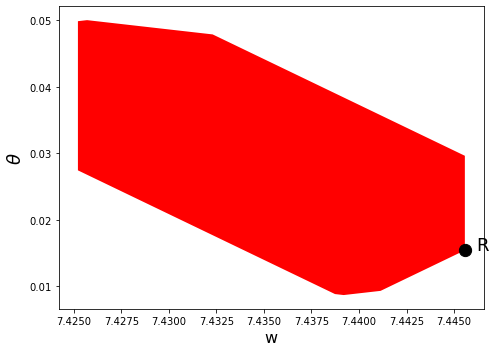

In [5]:
def plot_competitive(ChangModel):
    """
    Method that only plots competitive equilibrium set
    """
    poly_C = polytope.Polytope(ChangModel.H, ChangModel.c1_c)
    ext_C = polytope.extreme(poly_C)

    fig, ax = plt.subplots(figsize=(7, 5))

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel(r"$\theta$", fontsize=18)

    ax.fill(ext_C[:,0], ext_C[:,1], 'r', zorder=0)
    ChangModel.min_theta = min(ext_C[:, 1])
    ChangModel.max_theta = max(ext_C[:, 1])

    # Add point showing Ramsey Plan
    idx_Ramsey = np.where(ext_C[:, 0] == max(ext_C[:, 0]))[0][0]
    R = ext_C[idx_Ramsey, :]
    ax.scatter(R[0], R[1], 150, 'black', 'o', zorder=1)
    w_min = min(ext_C[:, 0])

    # Label Ramsey Plan slightly to the right of the point
    ax.annotate("R", xy=(R[0], R[1]), xytext=(R[0] + 0.03 * (R[0] - w_min),
                R[1]), fontsize=18)

    plt.tight_layout()
    plt.show()

plot_competitive(ch1)

In [6]:
ch2 = ChangModel(β=0.8, mbar=30, h_min=0.9, h_max=1/0.8,
                 n_h=8, n_m=35, N_g=10)
ch2.solve_sustainable()

### --------------- ###
Solving Chang Model Using Outer Hyperplane Approximation
### --------------- ### 

Maximum difference when updating hyperplane levels:


[0.06369]


[0.02476]


[0.02153]


[0.01915]


[0.01795]


[0.01642]


[0.01507]


[0.01284]


[0.01106]


[0.00694]


[0.0085]


[0.00781]


[0.00433]


[0.00492]


[0.00303]


[0.00182]


[0.00638]


[0.00116]


[0.00093]


[0.00075]


[0.0006]


[0.00494]


[0.00038]


[0.00121]


[0.00024]


[0.0002]


[0.00016]


[0.00013]


[0.0001]


[0.00008]


[0.00006]


[0.00005]


[0.00004]


[0.00003]


[0.00003]


[0.00002]


[0.00002]


[0.00001]


[0.00001]


[0.00001]
Convergence achieved after 40 iterations and 723.39             seconds


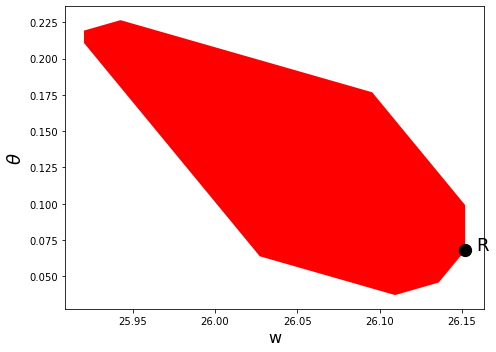

In [7]:
plot_competitive(ch2)

## Solving a Continuation Ramsey Planner's Bellman Equation

In this section we solve the Bellman equation confronting a **continuation Ramsey planner**.

The construction of a Ramsey plan is decomposed into a two subproblems in {doc}`Ramsey plans, time inconsistency, sustainable plans <calvo>`
and {doc}`dynamic Stackelberg problems <dyn_stack>`.

* Subproblem 1 is faced by a sequence of continuation Ramsey planners at $t \geq 1$.
* Subproblem 2 is faced by a Ramsey planner at $t = 0$.

The problem is:

$$
J(\theta) = \max_{m,x,h,\theta'} u(f(x)) + v(m) + \beta J(\theta')
$$

subject to:

$$
\theta \leq u'(f(x))x + v'(m)m + \beta \theta'
$$

$$
\theta = u'(f(x))(m + x )
$$

$$
x = m(h-1)
$$

$$
(m,x,h) \in E
$$

$$
\theta' \in \Omega
$$

To solve this Bellman equation, we must know the
set $\Omega$.

We have solved the Bellman equation for the two sets of parameter values
for which we computed the equilibrium value sets above.

Hence for these parameter configurations, we know the bounds of $\Omega$.

The two sets of parameters
differ only in the level of $\beta$.

From the figures earlier in this lecture,  we know that when $\beta = 0.3$,
$\Omega = [0.0088,0.0499]$, and when $\beta = 0.8$,
$\Omega = [0.0395,0.2193]$

In [8]:
ch1 = ChangModel(β=0.3, mbar=30, h_min=0.99, h_max=1/0.3,
                 n_h=8, n_m=35, N_g=50)
ch2 = ChangModel(β=0.8, mbar=30, h_min=0.1, h_max=1/0.8,
                 n_h=20, n_m=50, N_g=50)

/tmp/ipykernel_15323/1608401414.py:33: RuntimeWarning: invalid value encountered in log
  uc = lambda c: np.log(c)


In [9]:
ch1.solve_bellman(θ_min=0.01, θ_max=0.0499, order=30, tol=1e-6)
ch2.solve_bellman(θ_min=0.045, θ_max=0.15, order=30, tol=1e-6)

/tmp/ipykernel_15323/1608401414.py:309: RuntimeWarning: invalid value encountered in log
  uc = lambda c: np.log(c)


Convergence achieved after 15 iterations


/usr/share/miniconda3/envs/quantecon/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Convergence achieved after 72 iterations


First, a quick check that our approximations of the value functions are
good.

We do this by calculating the residuals between iterates on the value function on a fine grid:

In [10]:
max(abs(ch1.resid_grid)), max(abs(ch2.resid_grid))

(6.463131549061529e-06, 6.87553679767916e-07)

The value functions plotted below trace out the right edges of the sets
of equilibrium values plotted above

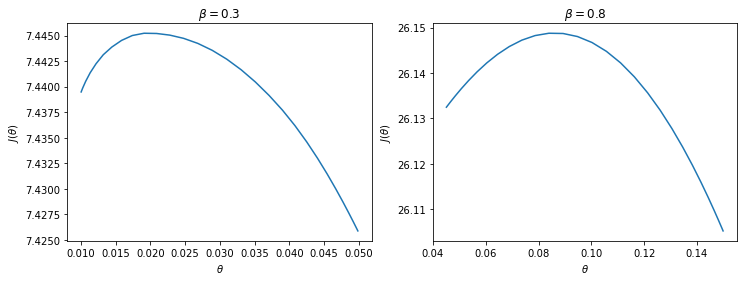

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, model in zip(axes, (ch1, ch2)):
    ax.plot(model.θ_grid, model.p_iter)
    ax.set(xlabel=r"$\theta$",
           ylabel=r"$J(\theta)$",
           title=rf"$\beta = {model.β}$")

plt.show()

The next figure plots the optimal policy functions; values of
$\theta',m,x,h$ for each value of the state $\theta$:

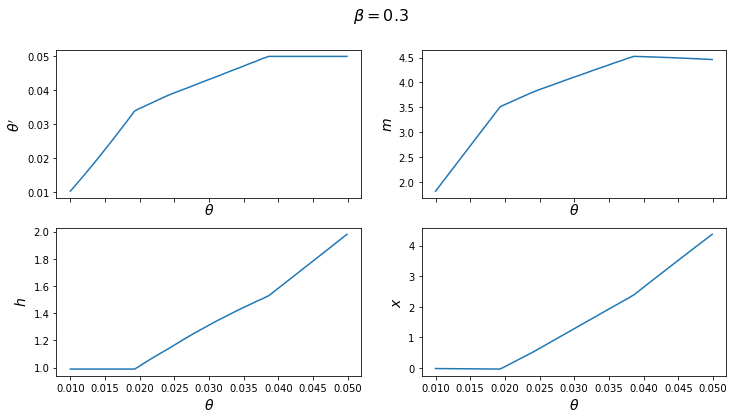

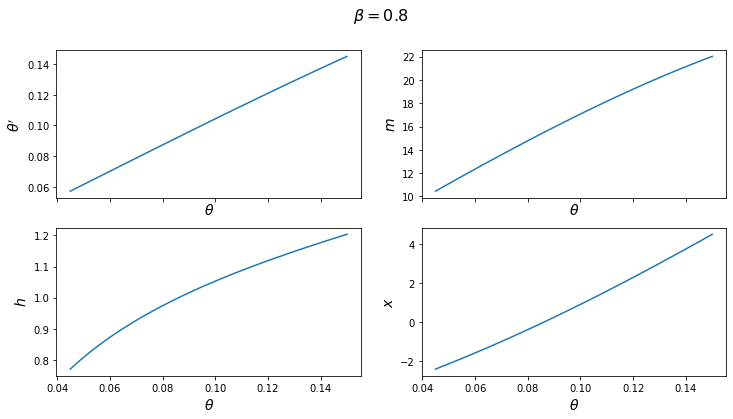

In [12]:
for model in (ch1, ch2):

    fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
    fig.suptitle(rf"$\beta = {model.β}$", fontsize=16)

    plots = [model.θ_prime_grid, model.m_grid,
             model.h_grid, model.x_grid]
    labels = [r"$\theta'$", "$m$", "$h$", "$x$"]

    for ax, plot, label in zip(axes.flatten(), plots, labels):
        ax.plot(model.θ_grid_fine, plot)
        ax.set_xlabel(r"$\theta$", fontsize=14)
        ax.set_ylabel(label, fontsize=14)

    plt.show()

With the first set of parameter values,  the value of $\theta'$ chosen by the Ramsey
planner quickly hits the upper limit of $\Omega$.

But with the second set of parameters  it converges to a value in the interior of the set.

Consequently, the choice of $\bar \theta$ is clearly important with the first set of parameter values.

One way of seeing this is plotting $\theta'(\theta)$ for each set
of parameters.

With the first set of parameter values,  this function does not intersect the
45-degree line until $\bar \theta$, whereas in the second set of parameter values, it
intersects in the interior.

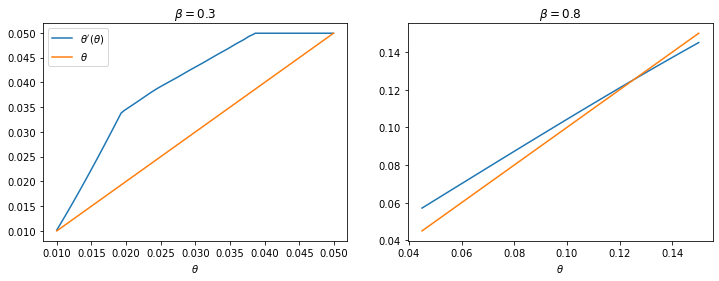

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, model in zip(axes, (ch1, ch2)):
    ax.plot(model.θ_grid_fine, model.θ_prime_grid, label=r"$\theta'(\theta)$")
    ax.plot(model.θ_grid_fine, model.θ_grid_fine, label=r"$\theta$")
    ax.set(xlabel=r"$\theta$", title=rf"$\beta = {model.β}$")

axes[0].legend()
plt.show()

Subproblem 2 is equivalent to the planner choosing the initial value of
$\theta$ (i.e. the value which maximizes the value function).

From this starting point, we can then trace out the paths for
$\{\theta_t,m_t,h_t,x_t\}_{t=0}^\infty$ that support this
equilibrium.

These are shown below for both sets of parameters

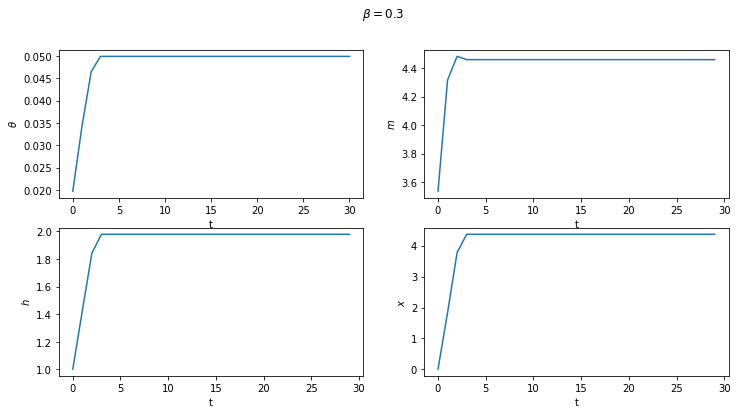

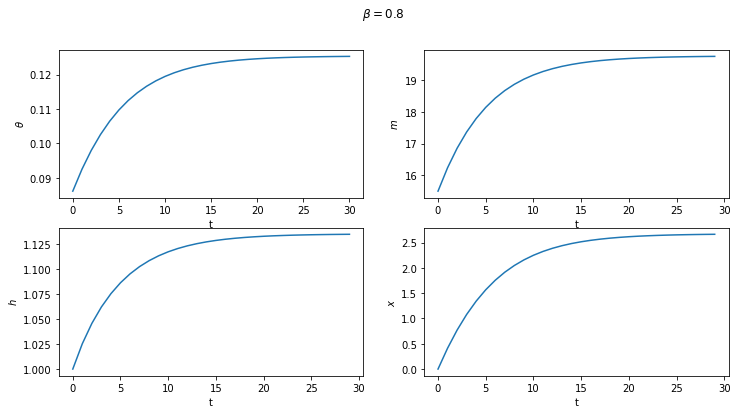

In [14]:
for model in (ch1, ch2):

    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    fig.suptitle(rf"$\beta = {model.β}$")

    plots = [model.θ_series, model.m_series, model.h_series, model.x_series]
    labels = [r"$\theta$", "$m$", "$h$", "$x$"]

    for ax, plot, label in zip(axes.flatten(), plots, labels):
        ax.plot(plot)
        ax.set(xlabel='t', ylabel=label)

    plt.show()

### Next Steps

In {doc}`Credible Government Policies in Chang Model <chang_credible>` we shall find
a subset of competitive equilibria that are **sustainable**
in the sense that a sequence of government administrations  that chooses
sequentially, rather than once and for all at time $0$ will choose to implement them.

In the process of constructing them, we shall construct another,
smaller set of competitive equilibria.